### Importación de datos



In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs con los datos en GitHub
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Lectura de cada tienda
t1 = pd.read_csv(url1); t1["Tienda"] = "Tienda 1"
t2 = pd.read_csv(url2); t2["Tienda"] = "Tienda 2"
t3 = pd.read_csv(url3); t3["Tienda"] = "Tienda 3"
t4 = pd.read_csv(url4); t4["Tienda"] = "Tienda 4"

# Unión de todos los datos
data = pd.concat([t1, t2, t3, t4], ignore_index=True)

# Normalización básica
data.columns = [c.strip() for c in data.columns]
data["Precio"] = pd.to_numeric(data["Precio"], errors="coerce")
data["Costo de envío"] = pd.to_numeric(data["Costo de envío"], errors="coerce")
data["Calificación"] = pd.to_numeric(data["Calificación"], errors="coerce")

data.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


# 1. Análisis de facturación

Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


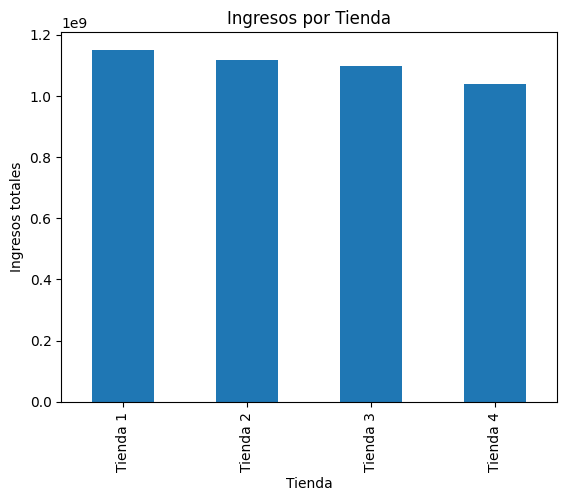

In [15]:
ingresos_tienda = data.groupby("Tienda")["Precio"].sum().sort_values(ascending=False)
print(ingresos_tienda)

ingresos_tienda.plot(kind="bar")
plt.title("Ingresos por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingresos totales")
plt.show()

# 2. Ventas por categoría

Categoría del Producto
Muebles                    1886
Electrónicos               1772
Juguetes                   1290
Electrodomésticos          1149
Deportes y diversión       1113
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
Name: count, dtype: int64


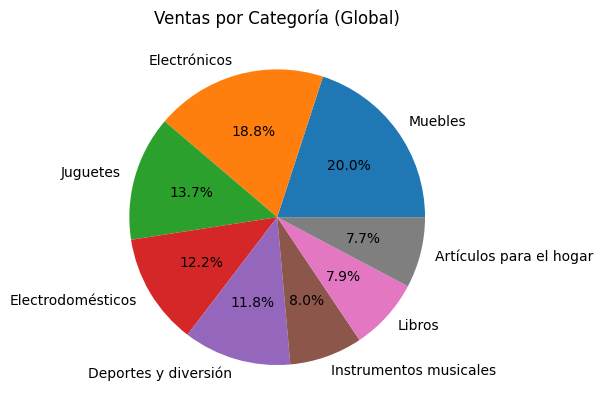

In [16]:
ventas_cat = data["Categoría del Producto"].value_counts()
print(ventas_cat)

ventas_cat.plot(kind="pie", autopct="%1.1f%%")
plt.title("Ventas por Categoría (Global)")
plt.ylabel("")
plt.show()

# 3. Calificación promedio de la tienda


Tienda
Tienda 1    3.976685
Tienda 2    4.037304
Tienda 3    4.048326
Tienda 4    3.995759
Name: Calificación, dtype: float64


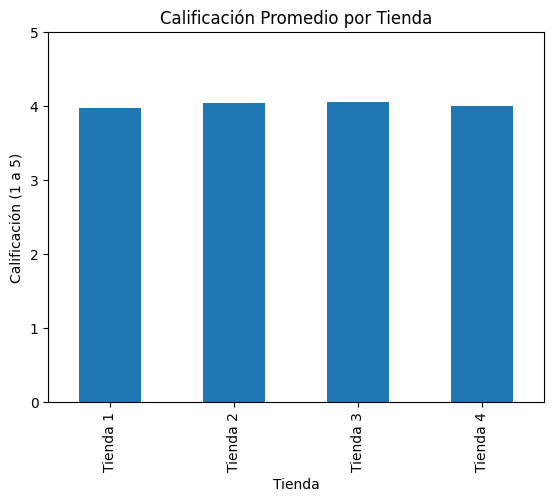

In [17]:
calif_prom = data.groupby("Tienda")["Calificación"].mean()
print(calif_prom)

calif_prom.plot(kind="bar")
plt.title("Calificación Promedio por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación (1 a 5)")
plt.ylim(0,5)
plt.show()

# 4. Productos más y menos vendidos

Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Secadora de ropa             200
Modelado predictivo          200
Set de ollas                 200
Cama box                     199
Bloques de construcción      199
Name: count, dtype: int64


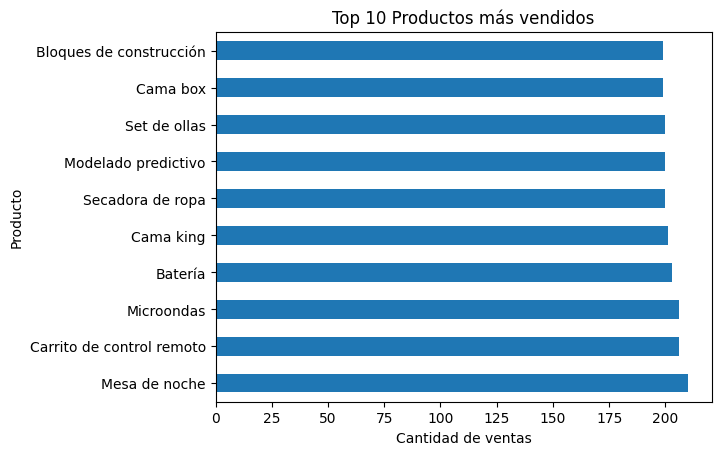

In [18]:
top_prod = data["Producto"].value_counts().head(10)
print(top_prod)

top_prod.plot(kind="barh")
plt.title("Top 10 Productos más vendidos")
plt.xlabel("Cantidad de ventas")
plt.ylabel("Producto")
plt.show()

# 5. Envío promedio por tienda

Tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo de envío, dtype: float64


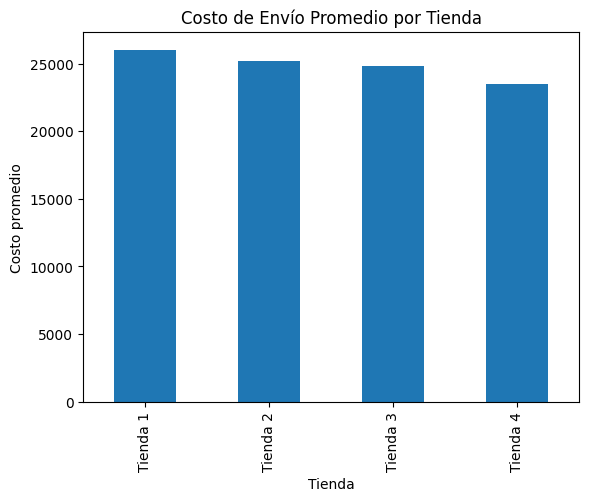

In [20]:
envio_prom = data.groupby("Tienda")["Costo de envío"].mean()
print(envio_prom)

envio_prom.plot(kind="bar")
plt.title("Costo de Envío Promedio por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo promedio")
plt.show()

# 6. Recomendación

Tras realizar el análisis de las cuatro tiendas de la cadena Alura Store, considerando las métricas de ingresos, calificación promedio de los clientes y costos de envío, se concluye lo siguiente:

- La Tienda 4 presenta los ingresos más bajos de todas las tiendas, lo que refleja un desempeño económico inferior en comparación con las demás.

- En cuanto a las reseñas de clientes, mantiene una calificación promedio similar al resto, sin destacar de manera significativa en satisfacción.

- Aunque la Tienda 4 muestra el costo de envío promedio más bajo, este aspecto positivo no logra compensar el hecho de que su facturación global es considerablemente menor.

En consecuencia, y de acuerdo con los criterios del desafío, se recomienda que el Sr. Juan considere vender la Tienda 4, dado que es la menos eficiente en términos de generación de ingresos y no posee ventajas competitivas destacables frente a las demás sucursales.